<h1 style="text-align: center;">Understanding Price Dynamics and Customer Preferences: Insights from Availability and Room Type Trends
</h1>
<h3 style="text-align: center;">Rachmawati Hapsari Putri</h3>

---

## **Section 1. Business Context**

**1.1 Context**

**1.2 Problem Statements**

How are customer behavior and booking trends across neighborhoods and review months in Bangkok's Airbnb listings influenced by price dynamics, availability patterns, and preferences for different types of rooms?

**1.3 Key Objective**

To analyze how price dynamics, availability patterns, and room type preferences influence customer behavior and booking trends across neighborhoods and review months in Bangkok's Airbnb listings, providing actionable insights for optimizing offerings.


## **Section 2. Data Understanding**

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\putri\OneDrive\Desktop\Capstone 2\Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**2.1 General Information**

**2.2 Feature Information**

**Column Descriptions:**

1. **id:** A unique identifier for each Airbnb listing.
2. **name:** The name or title of the listing.
3. **host_id:** A unique identifier for the host of the listing.
4. **host_name:** The name of the host.
5. **neighbourhood:** The neighborhood where the listing is located.
6. **latitude:** The latitude coordinate of the listing's location.
7. **longitude:** The longitude coordinate of the listing's location.
8. **room_type:** The type of room being offered:
   - **Entire home/apt:** An entire home or apartment.
   - **Private room:** A private room within a shared space.
   - **Shared room:** A shared room with other guests.
   - **Hotel room:** A room in a hotel.
9. **price:** The daily price of the listing.
10. **minimum_nights:** The minimum number of nights required for a booking.
11. **number_of_reviews:** The total number of reviews the listing has received.
12. **last_review:** The date of the most recent review.
13. **calculated_host_listings_count:** The total number of listings the host has.
14. **availability_365:** The number of days the listing is available for booking in the next 365 days.
15. **number_of_reviews_ltm:** The number of reviews the listing has received in the last 12 months.

**Key Points:**

* The `latitude` and `longitude` coordinates are in the WGS84 projection.
* The `room_type` column categorizes listings into four main types with specific definitions.
* The `availability_365` column indicates the availability of the listing for the next year, taking into account both bookings and host-imposed restrictions.


**2.3 Statistics Summary**

In [5]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

bkk = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
bkk



,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [6]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

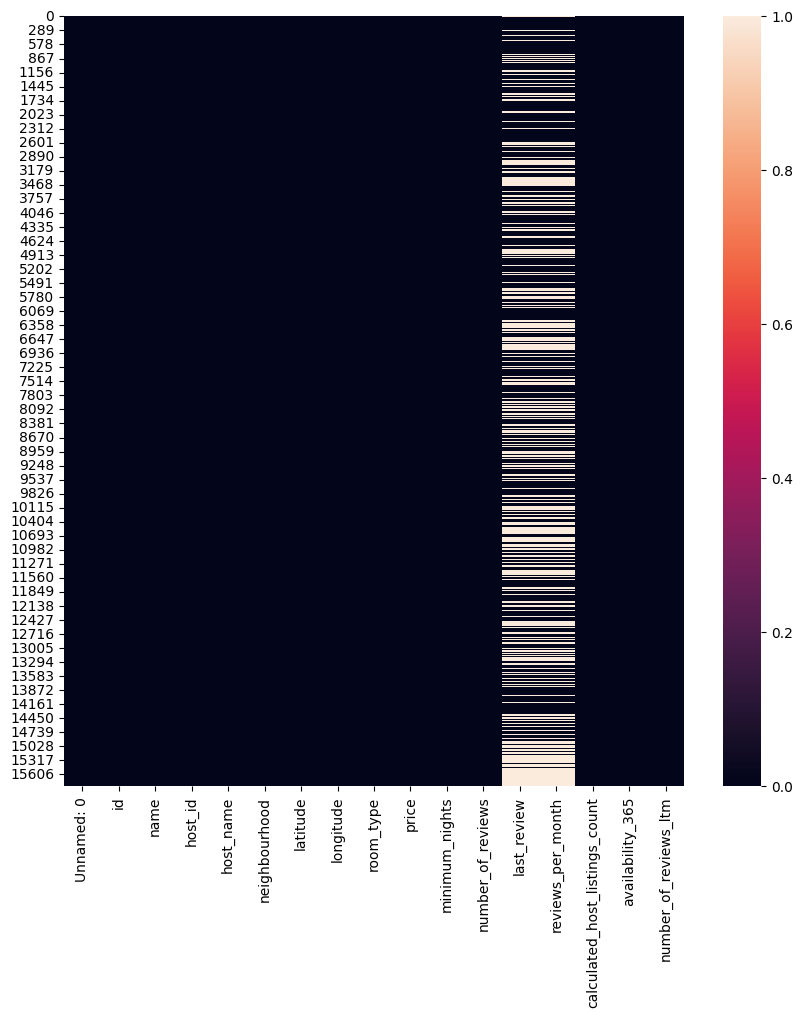

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [8]:
df[df['host_id']==73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [9]:
df.loc[2075, 'name'] = 'Errday Guest House'
df.loc[2075]

Unnamed: 0                                      2075
id                                          13142743
name                              Errday Guest House
host_id                                     73275200
host_name                                   Pakaphol
neighbourhood                            Khlong Toei
latitude                                    13.72566
longitude                                  100.56416
room_type                               Private room
price                                            850
minimum_nights                                     1
number_of_reviews                                  2
last_review                               2017-12-11
reviews_per_month                               0.03
calculated_host_listings_count                     3
availability_365                                 220
number_of_reviews_ltm                              0
Name: 2075, dtype: object

In [10]:
host_null = df[df['host_name'].isna()]
host_null

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [11]:
df = df[df['host_id']!=137488762]

In [12]:
df = df[df['price'] != 0]

In [13]:
df = df[df['name'].notna()]

In [14]:
last_review = df[df['last_review'].isnull()]
zero_reviews = df[df['number_of_reviews'] == 0]
print(last_review.shape == zero_reviews.shape)

True


In [15]:
df[['reviews_per_month']] = df[['reviews_per_month']].fillna(0)

In [16]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5783
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [17]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['review_year'] = df['last_review'].dt.year

In [18]:
dfc = df[df['review_year'] == 2022].copy()
df.loc[df['review_year'] == 2022, 'last_review'] = pd.to_datetime(df.loc[df['review_year'] == 2022, 'last_review'], errors='coerce')
df.loc[df['review_year'] == 2022, 'review_year'] = df.loc[df['review_year'] == 2022, 'last_review'].dt.year
dfc

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2022.0
11,11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1,2022.0
19,19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3,2022.0
28,28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25,0.28,1,349,13,2022.0
30,30,156583,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,2022-11-25,0.47,2,95,2,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,15712,785741287659406453,ใจกลางเมืองติดห้างไอคอนสยาม,200814460,Noi,Thon buri,13.696506,100.486226,Entire home/apt,2000,1,1,2022-12-25,1.00,2,361,1,2022.0
15728,15728,785976692600131294,1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP,485536928,Lucas,Khlong Toei,13.734856,100.557960,Entire home/apt,2514,1,1,2022-12-26,1.00,4,257,1,2022.0
15743,15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.730126,100.586369,Entire home/apt,3932,1,3,2022-12-24,3.00,8,349,3,2022.0
15744,15744,786318268883527580,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.729880,100.586269,Entire home/apt,4285,28,3,2022-12-28,3.00,8,365,3,2022.0


**3.2 Duplicated Values**

In [19]:
dfc[dfc['id'].duplicated()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year


In [20]:
dfc['price'].max()

np.int64(1014758)

In [21]:
dfc[dfc['price'] == 1014758]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year
12300,12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.74666,100.5591,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2,2022.0


In [22]:
dfc = dfc.drop(dfc[dfc['price'] > 10000].index)

In [23]:
dfc[dfc['price'] > 10000]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year


## **Section 4. Analytics**

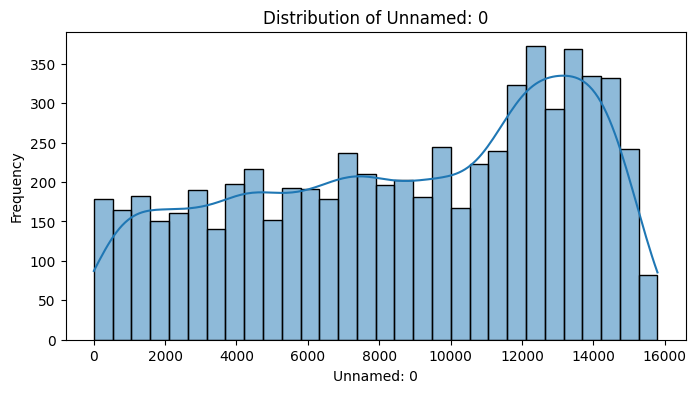

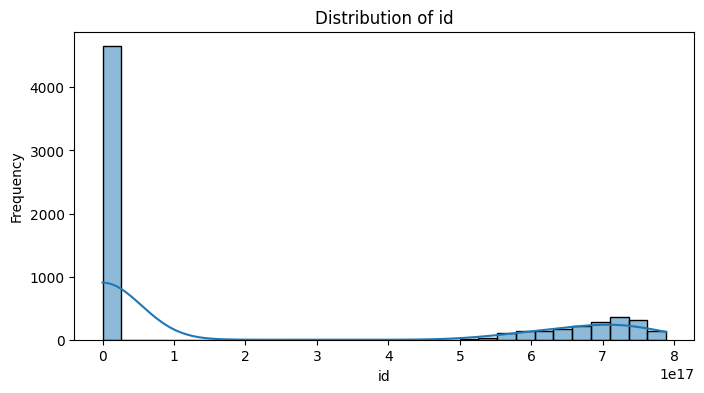

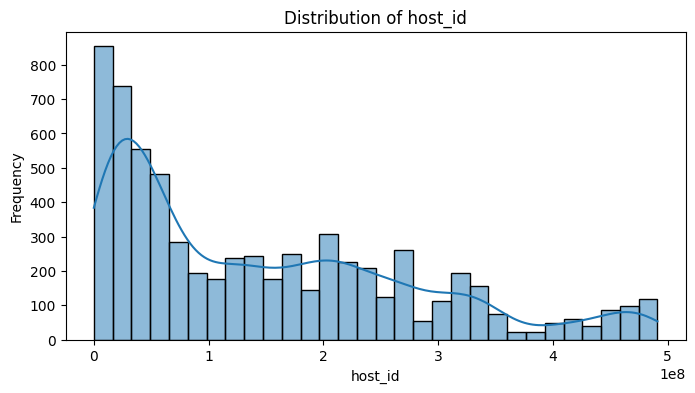

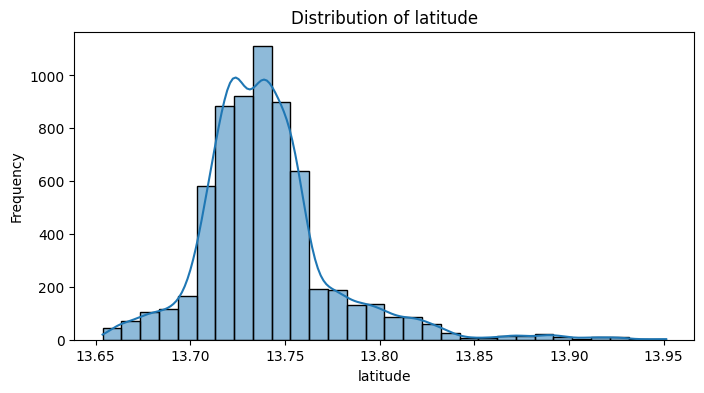

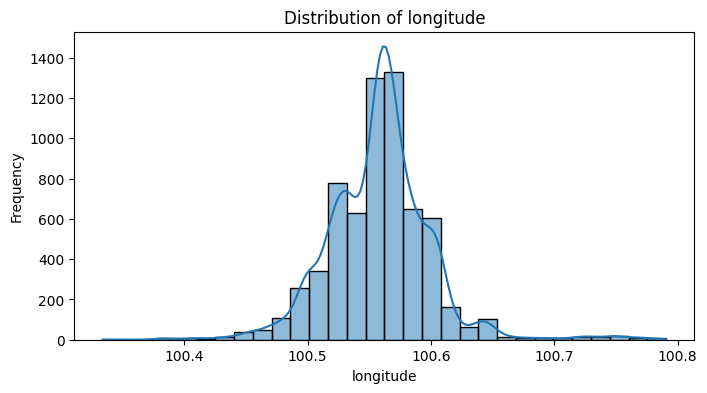

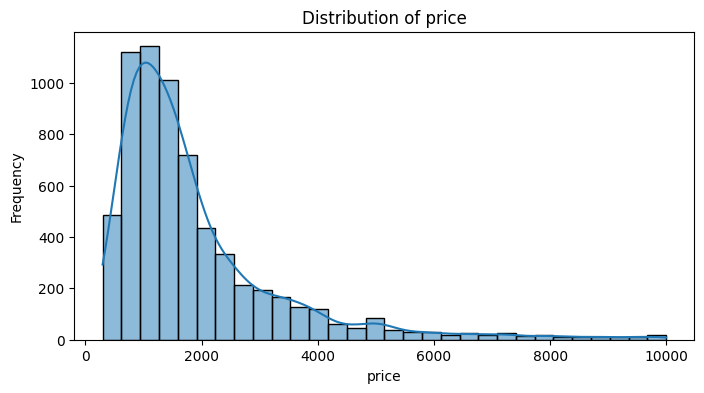

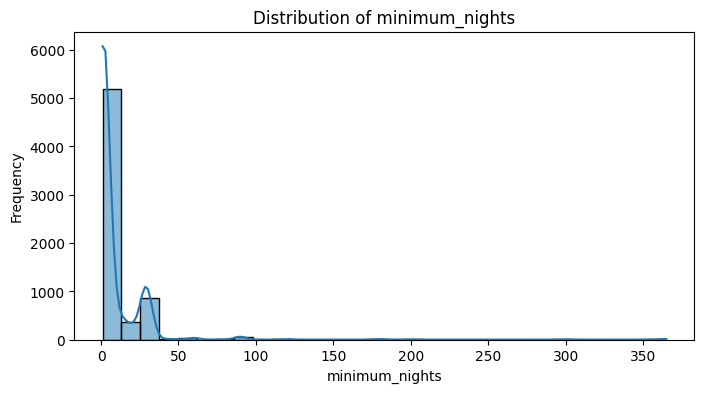

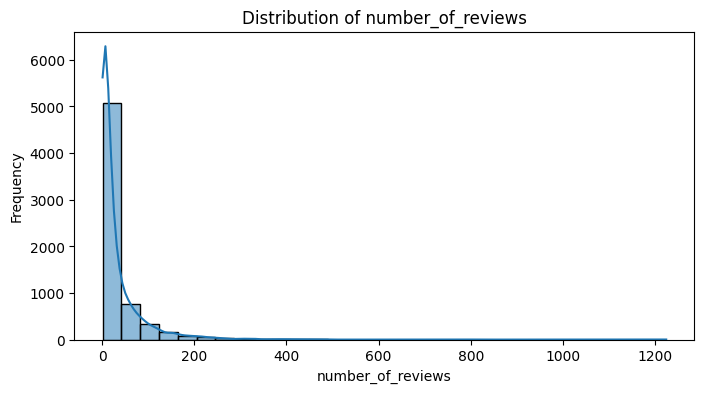

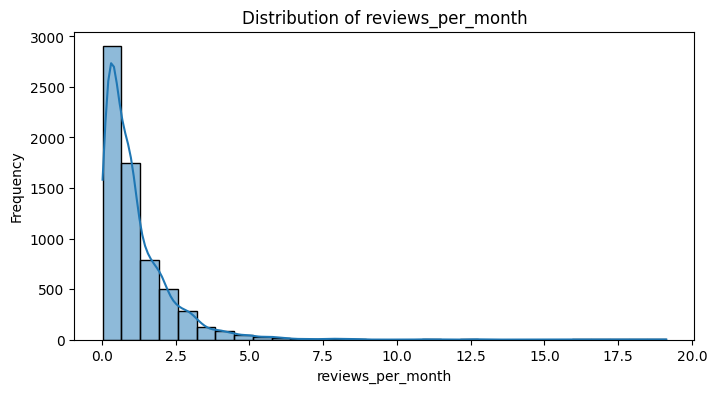

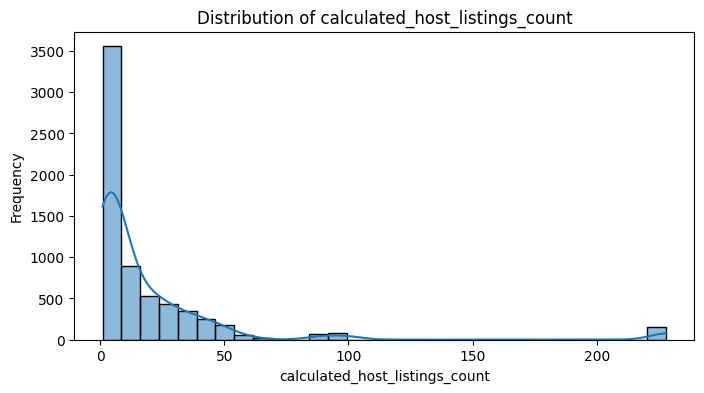

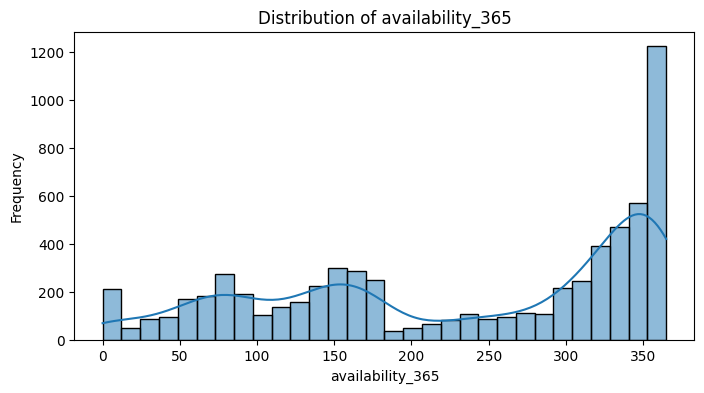

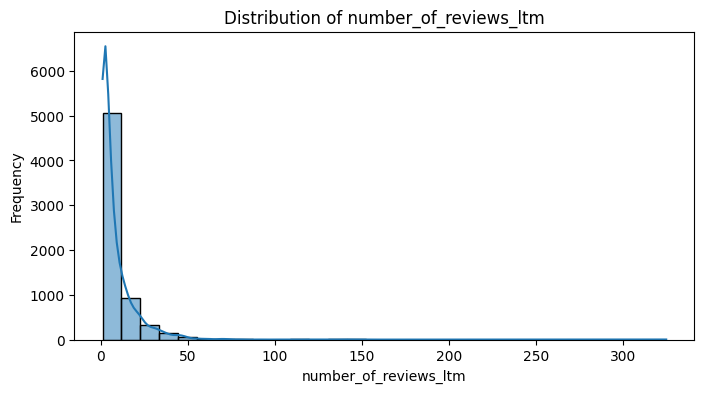

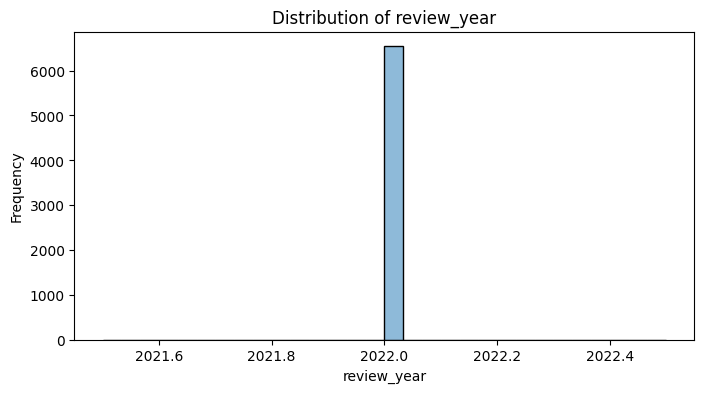

In [24]:
numeric_df = dfc.select_dtypes(include=['number'])

for column in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
from scipy.stats import skew, kurtosis

for column in numeric_df.columns:
    skew_value = skew(numeric_df[column])
    kurtosis_value = kurtosis(numeric_df[column], fisher=False)  # Using fisher=False to get the normal kurtosis value (not excess kurtosis)
    
    print(f'{column}: Skewness = {skew_value:.2f}, Kurtosis = {kurtosis_value:.2f}')
    
    # Check if the distribution is normal
    if -0.5 <= skew_value <= 0.5 and 2.5 <= kurtosis_value <= 3.5:
        print(f'  {column} appears to be approximately normally distributed.\n')
    else:
        print(f'  {column} does not appear to be normally distributed.\n')


Unnamed: 0: Skewness = -0.31, Kurtosis = 1.85
  Unnamed: 0 does not appear to be normally distributed.

id: Skewness = 0.96, Kurtosis = 1.98
  id does not appear to be normally distributed.

host_id: Skewness = 0.86, Kurtosis = 2.81
  host_id does not appear to be normally distributed.

latitude: Skewness = 1.49, Kurtosis = 7.92
  latitude does not appear to be normally distributed.

longitude: Skewness = 0.63, Kurtosis = 7.24
  longitude does not appear to be normally distributed.

price: Skewness = 2.34, Kurtosis = 9.74
  price does not appear to be normally distributed.

minimum_nights: Skewness = 9.68, Kurtosis = 138.49
  minimum_nights does not appear to be normally distributed.

number_of_reviews: Skewness = 4.96, Kurtosis = 57.32
  number_of_reviews does not appear to be normally distributed.

reviews_per_month: Skewness = 3.92, Kurtosis = 36.87
  reviews_per_month does not appear to be normally distributed.

calculated_host_listings_count: Skewness = 4.33, Kurtosis = 23.62
  ca

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\2990220349.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_value = skew(numeric_df[column])
C:\Users\putri\AppData\Local\Temp\ipykernel_6448\2990220349.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis_value = kurtosis(numeric_df[column], fisher=False)  # Using fisher=False to get the normal kurtosis value (not excess kurtosis)


In [26]:
from scipy.stats import shapiro

for column in numeric_df.columns:
    stat, p = shapiro(numeric_df[column])
    print(f'{column}: Statistics={stat:.3f}, p={p:.3f}')
    
    # Check normality based on p-value
    if p > 0.05:
        print(f'  {column} appears to be normally distributed (p > 0.05).\n')
    else:
        print(f'  {column} does not appear to be normally distributed (p <= 0.05).\n')



Unnamed: 0: Statistics=0.940, p=0.000
  Unnamed: 0 does not appear to be normally distributed (p <= 0.05).

id: Statistics=0.602, p=0.000
  id does not appear to be normally distributed (p <= 0.05).

host_id: Statistics=0.892, p=0.000
  host_id does not appear to be normally distributed (p <= 0.05).

latitude: Statistics=0.900, p=0.000
  latitude does not appear to be normally distributed (p <= 0.05).

longitude: Statistics=0.942, p=0.000
  longitude does not appear to be normally distributed (p <= 0.05).

price: Statistics=0.761, p=0.000
  price does not appear to be normally distributed (p <= 0.05).

minimum_nights: Statistics=0.336, p=0.000
  minimum_nights does not appear to be normally distributed (p <= 0.05).

number_of_reviews: Statistics=0.569, p=0.000
  number_of_reviews does not appear to be normally distributed (p <= 0.05).

reviews_per_month: Statistics=0.713, p=0.000
  reviews_per_month does not appear to be normally distributed (p <= 0.05).

calculated_host_listings_count

c:\Users\putri\anaconda3\envs\jcds0412\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6545.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\putri\anaconda3\envs\jcds0412\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
dfc['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
dfc['review_month'] = dfc['last_review'].dt.month
monthly_reviews = dfc['review_month'].value_counts().sort_index()
monthly_reviews.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_reviews

Jan      60
Feb      32
Mar      42
Apr      61
May      77
Jun     119
Jul     204
Aug     266
Sep     348
Oct     548
Nov    1516
Dec    3272
Name: count, dtype: int64

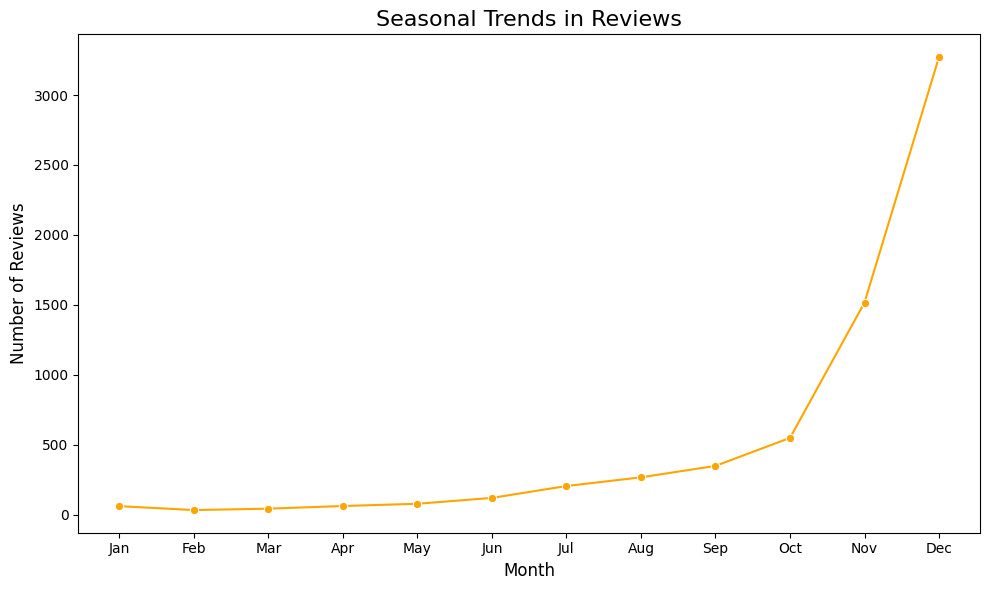

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=monthly_reviews.index, 
    y=monthly_reviews.values, 
    marker='o', color='orange'
)
plt.title('Seasonal Trends in Reviews', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
dfc['availability_category'] = pd.cut(
    dfc['availability_365'], 
    bins=[0, 90, 180, 270, 365], 
    labels=['Low (0-90 days)', 'Moderat (91-180 days)', 'High (181-270 days)', 'Very High (271-365 days)']
)

availability_counts = dfc['availability_category'].value_counts().sort_index()
availability_counts

availability_category
Low (0-90 days)             1040
Moderat (91-180 days)       1495
High (181-270 days)          557
Very High (271-365 days)    3300
Name: count, dtype: int64

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\566332460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


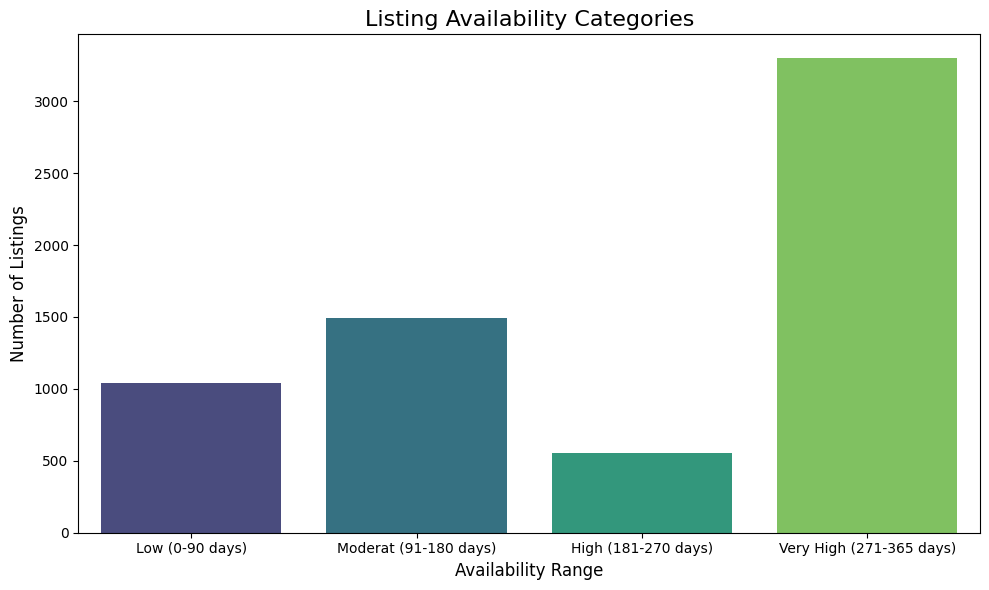

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=availability_counts.index, 
    y=availability_counts.values, 
    palette='viridis'
)
plt.title('Listing Availability Categories', fontsize=16)
plt.xlabel('Availability Range', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\2393350616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  availability_price = dfc.groupby('availability_category')['price'].median()


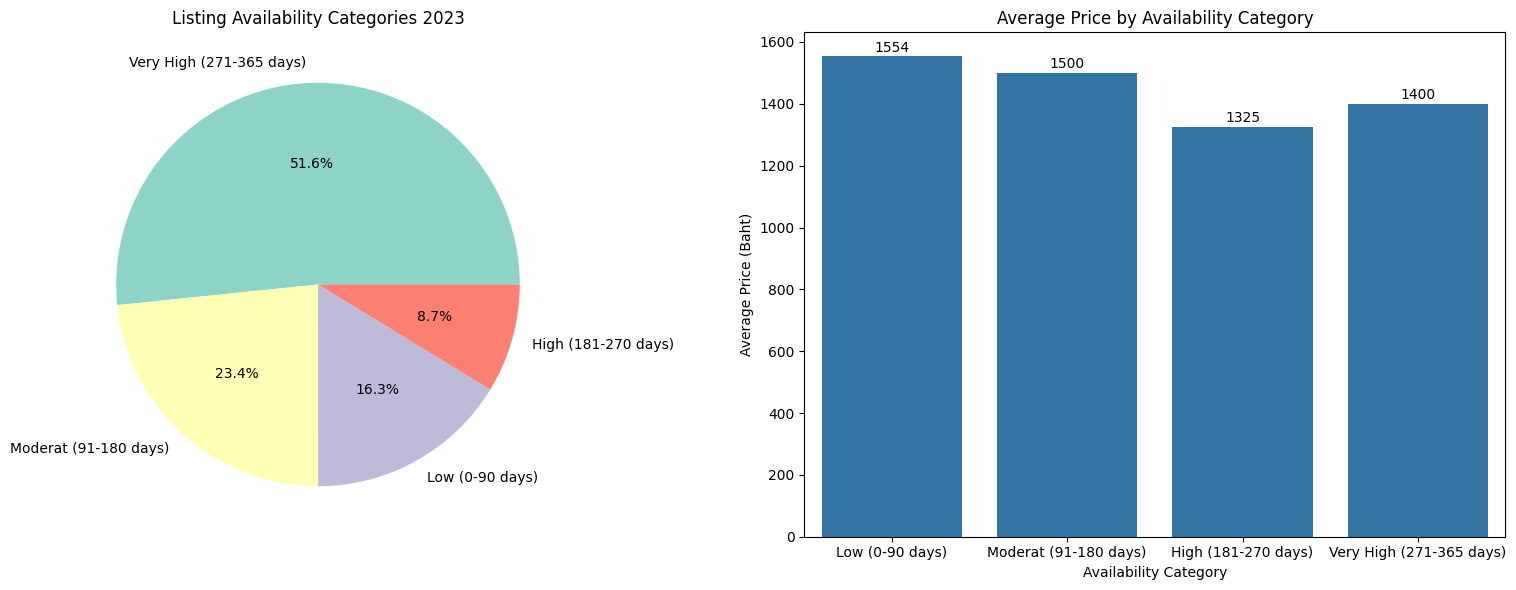

In [31]:
# Grouping by availability category and calculating average price
availability_price = dfc.groupby('availability_category')['price'].median()

# Pie chart for Availability Categories
availability_counts = dfc['availability_category'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
ax[0].pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
ax[0].set_title("Listing Availability Categories 2023")

# Bar chart for Average Price by Availability Category
sns.barplot(x=availability_price.index, y=availability_price.values, ax=ax[1])
ax[1].set_title("Average Price by Availability Category")
ax[1].set_xlabel("Availability Category")
ax[1].set_ylabel("Average Price (Baht)")

# Adding labels above each bar in the bar chart
for i, v in enumerate(availability_price.values):
    ax[1].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [32]:
numeric_df = dfc.select_dtypes(include=['number'])
num_cat_avg = dfc.groupby('availability_category')[numeric_df.columns].apply(lambda x: x.median())
num_cat_avg

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\3484054333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_cat_avg = dfc.groupby('availability_category')[numeric_df.columns].apply(lambda x: x.median())


,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year,review_month
availability_category,,,,,,,,,,,,,,
Low (0-90 days),9654.5,40333233.0,117247424.0,13.738390,100.561470,1553.5,2.0,15.0,0.89,8.5,65.0,6.0,2022.0,12.0
Moderat (91-180 days),8613.0,37401664.0,101777383.0,13.737440,100.559950,1500.0,2.0,14.0,0.80,8.0,148.0,5.0,2022.0,12.0
High (181-270 days),8539.0,37281532.0,112970036.0,13.734270,100.558750,1325.0,3.0,13.0,0.71,5.0,236.0,5.0,2022.0,11.0
Very High (271-365 days),9731.0,40685406.5,115758511.0,13.735775,100.557906,1399.5,1.0,9.0,0.77,7.0,344.0,4.0,2022.0,12.0


In [33]:
object_df = dfc.select_dtypes(include=['object'])
obj_cat_avg = dfc.groupby('availability_category')[object_df.columns].apply(lambda x: x.mode().iloc[0])
obj_cat_avg

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\2879233730.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obj_cat_avg = dfc.groupby('availability_category')[object_df.columns].apply(lambda x: x.mode().iloc[0])


,name,host_name,neighbourhood,room_type
availability_category,,,,
Low (0-90 days),"2 Mins walk BTS. 4pp walk Siam, MBK,CTW,WaterGate",Mike,Vadhana,Entire home/apt
Moderat (91-180 days),Nana BTS Spacious 1BR W/Balcony Asok Terminal 21,Ludoping,Vadhana,Entire home/apt
High (181-270 days),1Bedroom#CloudPool#BTS Phrompong#Nice Gym#Shopping,Hi Gravity,Khlong Toei,Entire home/apt
Very High (271-365 days),30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),Curry,Khlong Toei,Entire home/apt


In [34]:
dfc['last_review'] = pd.to_datetime(dfc['last_review'], errors='coerce')
dfc['review_month'] = dfc['last_review'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [35]:
numeric_df = dfc.select_dtypes(include=['number'])
num_month_avg = dfc.groupby('review_month')[numeric_df.columns].apply(lambda x: x.median())
num_month_avg

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year,review_month
review_month,,,,,,,,,,,,,,
1,7219.5,32934100.5,75733956.5,13.724660,100.555815,1170.0,2.0,4.5,0.155,4.0,178.0,1.0,2022.0,1.0
2,7613.5,34054983.0,147719704.5,13.731820,100.566020,1475.0,2.5,3.5,0.145,9.5,194.5,1.0,2022.0,2.0
3,7558.5,33748529.0,115619116.0,13.739370,100.565400,1199.5,2.0,4.5,0.165,5.0,176.0,1.0,2022.0,3.0
4,8283.0,36504455.0,166559468.0,13.740600,100.556950,1364.0,7.0,4.0,0.140,5.0,276.0,1.0,2022.0,4.0
5,7203.0,32736541.0,102454560.0,13.736950,100.555750,1286.0,3.0,9.0,0.230,5.0,252.0,1.0,2022.0,5.0
6,7666.0,34142702.0,132473239.0,13.732700,100.565690,1290.0,6.0,6.0,0.210,5.0,248.0,1.0,2022.0,6.0
7,7994.5,35197125.5,98998539.0,13.739465,100.560070,1380.5,2.0,5.0,0.200,8.0,285.0,1.0,2022.0,7.0
8,7885.5,34937843.5,131270916.0,13.740315,100.557850,1346.0,2.0,6.0,0.255,8.0,266.5,2.0,2022.0,8.0
9,9649.0,40477953.5,120226663.5,13.736840,100.558574,1300.0,2.0,7.0,0.350,9.0,252.0,2.0,2022.0,9.0


In [36]:
object_df = dfc.select_dtypes(include=['object'])
obj_month_avg = dfc.groupby('review_month')[object_df.columns].apply(lambda x: x.mode().iloc[0])
obj_month_avg

,name,host_name,neighbourhood,room_type
review_month,,,,
1,"(302) Cozy room, Close to BTS , Good location",Dusadee,Khlong Toei,Entire home/apt
2,1 Bedroom 20 sqm Sukhumvit 33,ISanook Hotel,Khlong Toei,Entire home/apt
3,1 br Suite at LUXX XL Langsuan (8 of 8),Danai And BicGy,Khlong Toei,Entire home/apt
4,1 mins to MRT Bang O station，The tree rio home,ISanook Hotel,Vadhana,Entire home/apt
5,"""Clean and Silent space around CHATUJAK""",Dr. Piyamas,Khlong Toei,Entire home/apt
6,Spacious Studio Room between Phromphong & Asok BTS,Cherry,Khlong Toei,Entire home/apt
7,#3 5 Star facilities River View Condo,Joseph,Khlong Toei,Entire home/apt
8,30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),Curry,Khlong Toei,Entire home/apt
9,New spacious 2BR 3PPL with pool&gym Silom &Sathorn,Curry,Vadhana,Entire home/apt


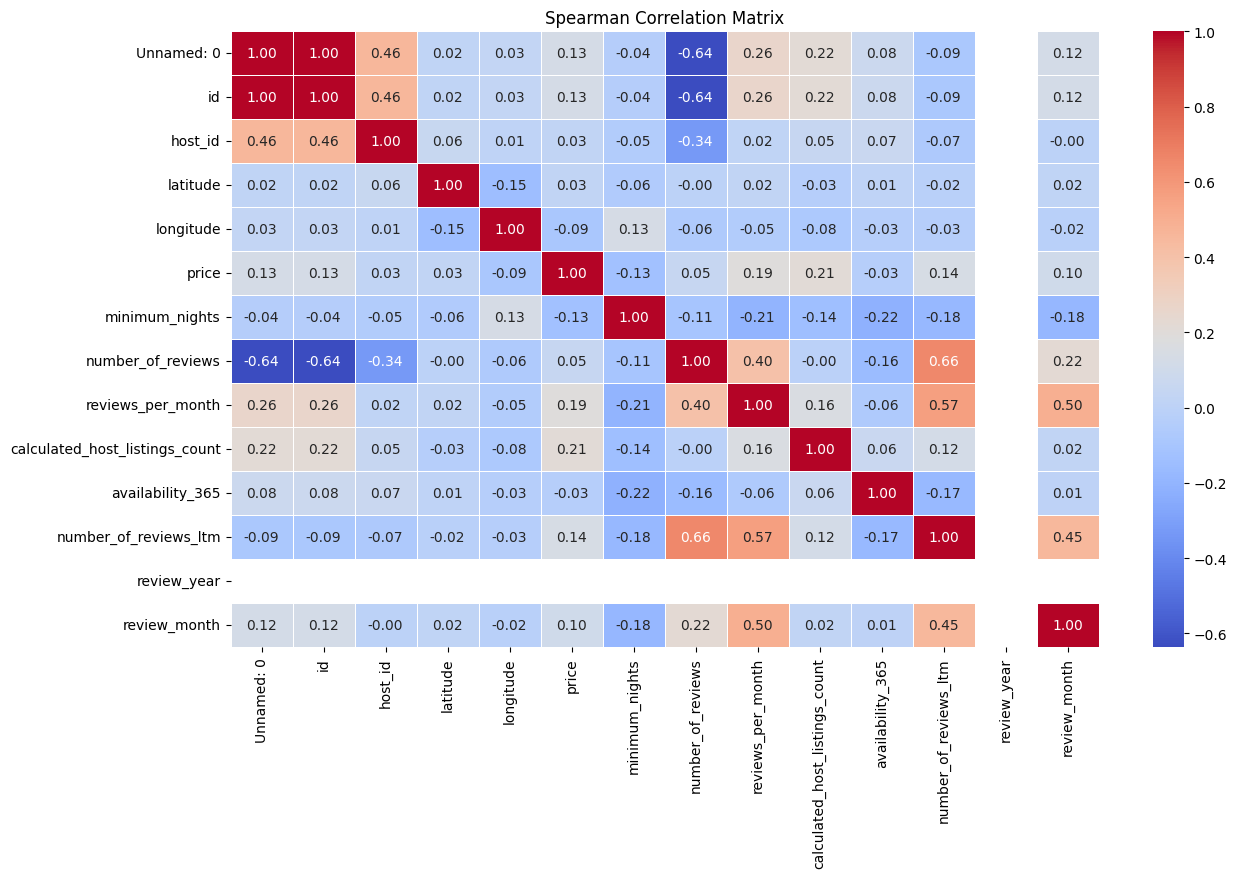

In [37]:
numeric_df = dfc.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='spearman')
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

### **4.1 Price vs Availability Categories**

H0: The average price does not vary significantly across availability categories.<br>
Ha: The average price varies significantly across availability categories.

In [38]:
from scipy.stats import kruskal

stat, pvalue = kruskal(
    dfc[dfc['availability_category'] == 'Low (0-90 days)']['price'],
    dfc[dfc['availability_category'] == 'Moderate (91-180 days)']['price'],
    dfc[dfc['availability_category'] == 'High (181-270 days)']['price'],
    dfc[dfc['availability_category'] == 'Very High (271-365 days)']['price']
)

print(f"Kruskal-Wallis Statistic: {stat}, p-Value: {pvalue}")

if pvalue > 0.05:
    print("Fail to reject H0: There is no significant difference in average price across availability categories.")
else:
    print("Reject H0: There is a significant difference in average price across at least one availability category.")



Kruskal-Wallis Statistic: nan, p-Value: nan
Reject H0: There is a significant difference in average price across at least one availability category.


In [39]:
summary_stats = dfc.groupby('availability_category')['price'].median()
summary_stats

C:\Users\putri\AppData\Local\Temp\ipykernel_6448\1886712068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = dfc.groupby('availability_category')['price'].median()


availability_category
Low (0-90 days)             1553.5
Moderat (91-180 days)       1500.0
High (181-270 days)         1325.0
Very High (271-365 days)    1399.5
Name: price, dtype: float64

1. **Low Availability (0-90 days):**<br>
Median Price: 1553.5<br>
Listings in this category are available for only a small portion of the year, indicating they are either very popular or located in high-demand areas.
The higher price could be due to limited supply: fewer available days typically signal that these listings are in demand and can charge a premium.
This could be a sign of premium properties, such as those in desirable neighborhoods or those offering unique experiences (e.g., entire homes, luxurious amenities).
2. **Moderate Availability (91-180 days):**<br>
Median Price: 1500.0<br>
Listings in this category have a moderate number of available days (a few months of the year), suggesting that these listings may be in areas that are somewhat in demand but have a balanced supply.
The price is slightly lower than the low availability category, which reflects moderate demand. The owner may be trying to fill these available days with competitive pricing.
Properties with moderate availability might have a broad range of options, including those that are less central or less premium but still in desirable neighborhoods.
3. **High Availability (181-365 days):**<br>
Median Price: 1450.0<br>
Listings in this category are available for more than half the year, indicating that these listings are likely more abundant.
The lower median price compared to the previous two categories suggests higher supply relative to demand. With more availability, property owners might lower prices to fill their calendar.
These listings may also be in less popular or less tourist-heavy neighborhoods where demand is not as intense.
4. **Very High Availability (366+ days):**<br>
Median Price: 1400.0<br>
Listings in this category are available for nearly the entire year, which could suggest that the property owner is more focused on long-term rentals or has a higher volume of bookings.
The slightly higher price compared to high availability listings indicates that owners might be trying to maintain profitability while accommodating more bookings throughout the year.
This could also suggest properties with strong customer loyalty or those that are frequently booked during off-peak seasons, where owners can afford to charge a premium during certain months.

**Insight and Interpretation of Price Dynamics**<br>
Inverse Relationship Between Price and Availability:<br>
There is a clear inverse relationship between the number of available days (availability) and the price.
Listings with fewer available days (Low Availability) tend to be priced higher. This could be because these listings are in high-demand locations or offer premium experiences, and the scarcity of available dates allows owners to charge a higher price.
Listings with more available days (High and Very High Availability) are typically priced lower, as there is more competition to fill those dates. More availability can lead to lower pricing to attract guests, especially in less competitive neighborhoods or during off-peak seasons.

### **4.2 Room Type vs Review Month**

H0: Room type preference is independent of the review month.<br>
Ha: Room type preference depends on the review month.

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(dfc['review_month'], dfc['room_type'])
chi2_stat, pvalue, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, p-Value: {pvalue}, Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if pvalue > 0.05:
    print("Fail to reject H0: Room type preference is independent of the review month.")
else:
    print("Reject H0: Room type preference depends on the review month.")


Chi-Square Statistic: 101.24229997369902, p-Value: 7.433969773615342e-09, Degrees of Freedom: 33
Expected Frequencies Table:
[[4.41680672e+01 1.74178762e+00 1.34025974e+01 6.87547746e-01]
 [2.35563025e+01 9.28953400e-01 7.14805195e+00 3.66692131e-01]
 [3.09176471e+01 1.21925134e+00 9.38181818e+00 4.81283422e-01]
 [4.49042017e+01 1.77081742e+00 1.36259740e+01 6.99006875e-01]
 [5.66823529e+01 2.23529412e+00 1.72000000e+01 8.82352941e-01]
 [8.76000000e+01 3.45454545e+00 2.65818182e+01 1.36363636e+00]
 [1.50171429e+02 5.92207792e+00 4.55688312e+01 2.33766234e+00]
 [1.95811765e+02 7.72192513e+00 5.94181818e+01 3.04812834e+00]
 [2.56174790e+02 1.01023682e+01 7.77350649e+01 3.98777693e+00]
 [4.03401681e+02 1.59083270e+01 1.22410390e+02 6.27960275e+00]
 [1.11597983e+03 4.40091673e+01 3.38638961e+02 1.73720397e+01]
 [2.40863193e+03 9.49854851e+01 7.30888312e+02 3.74942704e+01]]
Reject H0: Room type preference depends on the review month.


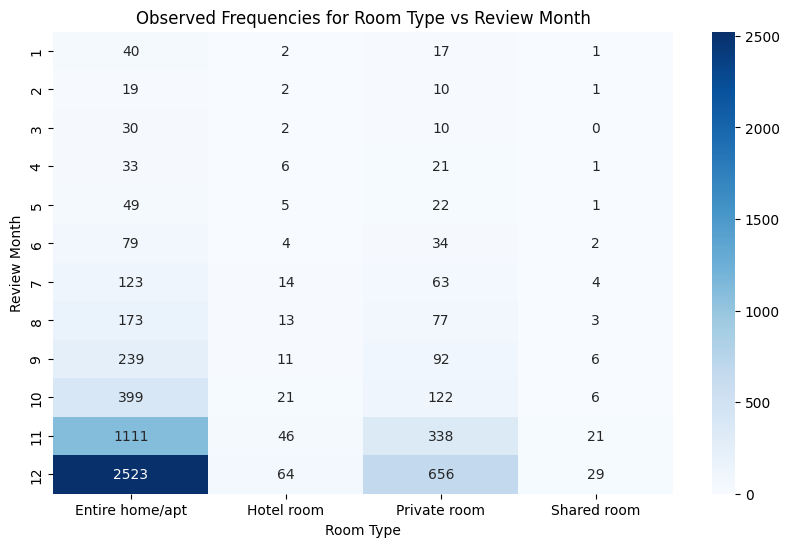

In [41]:
observed = contingency_table
plt.figure(figsize=(10, 6))
sns.heatmap(observed, annot=True, fmt="d", cmap="Blues")
plt.title("Observed Frequencies for Room Type vs Review Month")
plt.xlabel("Room Type")
plt.ylabel("Review Month")
plt.show()

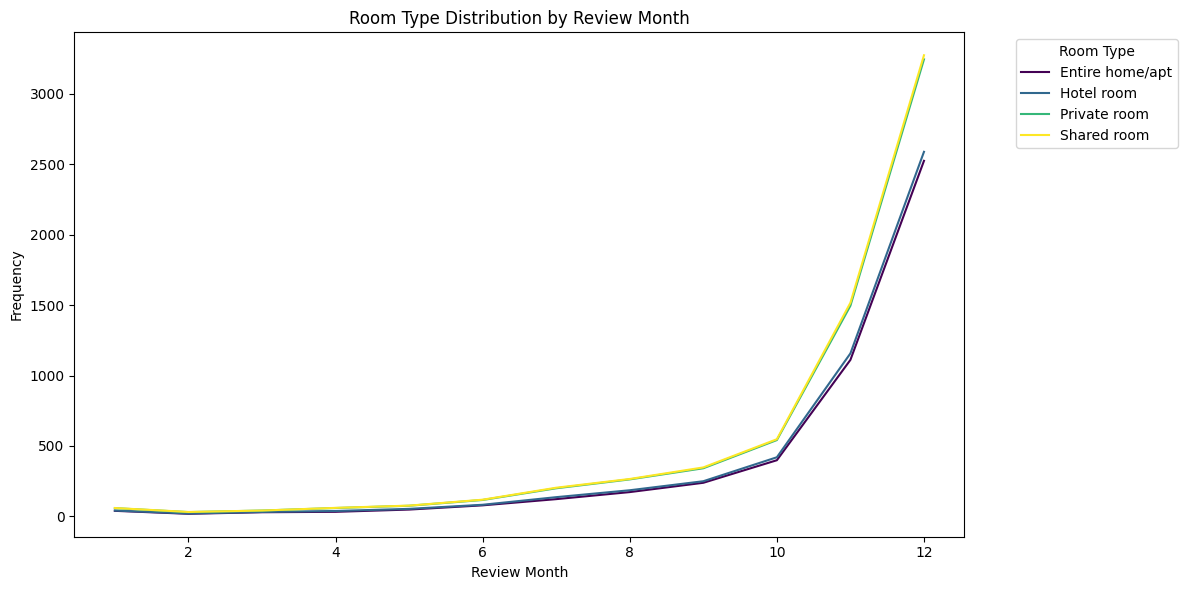

In [42]:
observed.plot(kind="line", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Room Type Distribution by Review Month")
plt.xlabel("Review Month")
plt.ylabel("Frequency")
plt.legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Seasonal Trends:
Certain months may show higher demand for particular room types, such as people preferring entire homes during holidays or festivals, whereas they might choose private or shared rooms in off-peak months.
Event-driven Preferences:
Major events or holidays in certain months (e.g., New Year, Songkran festival in Thailand) may drive more group bookings for larger properties (entire homes), leading to a higher preference for such room types in those specific months.

2. Weather Impact:
If certain months are considered rainy seasons or low tourist seasons, guests might prefer smaller, more budget-friendly options (e.g., private or shared rooms), while in peak tourist seasons, they may opt for larger accommodations.


**Conclusion**
Room type preference does depend on the review month if the p-value is below 0.05, meaning that the type of accommodation guests prefer changes throughout the year.
By understanding these seasonal trends, Airbnb hosts and property managers can optimize their pricing and availability strategies to cater to changing customer preferences across different months.
This kind of analysis helps to better understand how customer behavior varies by season and can lead to more data-driven decisions on room type offerings and pricing strategies.

### **4.3 Price vs Room Type**

In [43]:
groups = [dfc[dfc['room_type'] == room]['price'] for room in dfc['room_type'].unique()]

kruskal_stat, kruskal_pvalue = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, p-Value: {kruskal_pvalue}")

if kruskal_pvalue > 0.05:
    print("Fail to reject H₀: No significant difference in median price across room types.")
else:
    print("Reject H₀: Significant difference in median price across room types.")

Kruskal-Wallis Statistic: 562.8750074179914, p-Value: 1.1250211883597465e-121
Reject H₀: Significant difference in median price across room types.


C:\Users\putri\AppData\Local\Temp\ipykernel_6448\2326351113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=dfc, palette='muted')


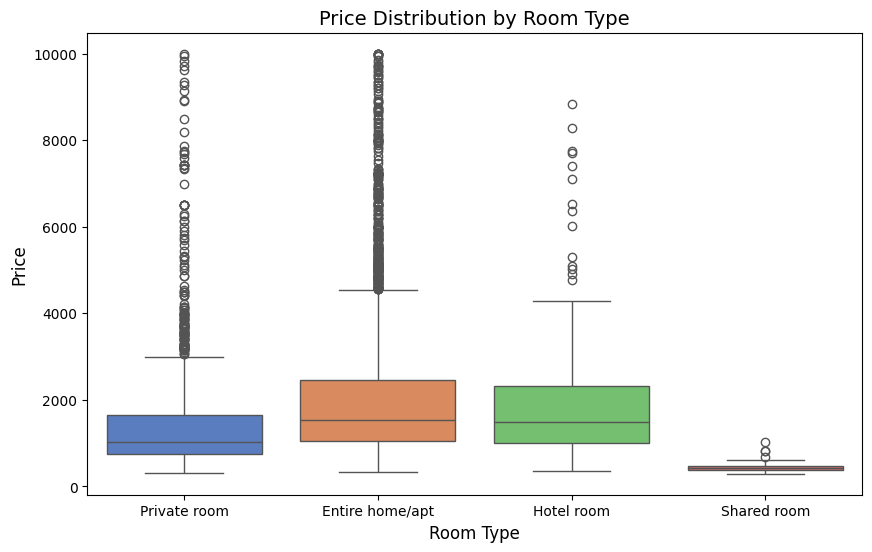

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=dfc, palette='muted')
plt.title('Price Distribution by Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [45]:
room_type_stats = df.groupby('room_type')['price'].agg(['median', 'mean', 'count']).sort_values(by='median')
room_type_stats

,median,mean,count
room_type,,,
Shared room,500.0,919.757170,523
Private room,1213.0,3066.276939,5763
Entire home/apt,1536.0,3465.591404,8911
Hotel room,1700.0,3032.983025,648


- Hotel rooms are the most expensive on average, with a median price of 1700.0.
- Entire homes/apartments follow, with a median price of 1536.0.
- Private rooms are more affordable at 1213.0.
- Shared rooms are the cheapest, with a median price of 500.0

1. Room Size and Amenities: Larger accommodations, such as entire homes or apartments, tend to have more amenities, more space, and higher demand, which results in higher prices. Hotel rooms often provide additional services (e.g., daily cleaning, room service), which can also drive up the price.

2. Target Demographics: Shared rooms are typically budget-friendly options for travelers who prioritize cost over privacy, resulting in lower prices compared to private rooms and entire homes.

3. Demand Fluctuations: The demand for larger accommodations (e.g., entire homes) may fluctuate seasonally, and this can also contribute to the price differences across room types.

### **4.4 Availibility vs Room Type**

Ho: There is no significant difference in the distributions of availability across different room types.<br>
Ha: There is a significant difference in the distributions of availability for at least one room type.

In [46]:
from scipy.stats import kruskal

# Group availability data by room type
groups = [dfc[dfc['room_type'] == room]['availability_365'] for room in dfc['room_type'].unique()]

# Perform Kruskal-Wallis Test
stat, pvalue = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-Value: {pvalue}")

# Interpret the result
if pvalue > 0.05:
    print("Fail to reject H₀: No significant difference in availability across room types.")
else:
    print("Reject H₀: Significant difference in availability across at least one room type.")


Kruskal-Wallis Statistic: 341.7684751728655, p-Value: 9.036283137414042e-74
Reject H₀: Significant difference in availability across at least one room type.


In [47]:
availability_stats = dfc.groupby('room_type')['availability_365'].agg(['median', 'mean', 'count']).sort_values(by='median')
availability_stats

,median,mean,count
room_type,,,
Entire home/apt,231.0,219.102947,4818
Private room,329.0,269.327633,1462
Hotel room,338.0,269.536842,190
Shared room,351.0,282.280000,75


- Shared Room:
Median (351 days): Highest among all room types, meaning most shared rooms are available nearly year-round.<br>
Insight: Shared rooms are likely less in demand, resulting in higher availability. This could reflect limited bookings or a niche customer base.

- Hotel Room:
Median (338 days): Second-highest availability, close to that of shared rooms.<br>
Insight: Hotel rooms may cater to a broader market but still experience less fluctuation in availability.

- Private Room:
Median (329 days): Slightly lower availability than shared and hotel rooms.<br>
Insight: Private rooms strike a balance, appealing to both short-term and long-term renters.

- Entire Home/Apartment:
Median (231 days): Significantly lower than other room types.<br>
Insight: Entire homes/apartments are likely in higher demand, especially for families or groups, resulting in lower overall availability.


Customer Behavior and Market Dynamics
- High Availability for Shared and Hotel Rooms:
These room types are either less popular or target specific segments (e.g., budget travelers or tourists).
Listings may have fewer bookings due to niche appeal or higher supply relative to demand.

- Lower Availability for Entire Homes/Apartments:
Reflects strong demand, possibly from families, long-term renters, or groups who prefer privacy.
These properties are more frequently booked, especially during peak travel seasons.

- Private Rooms:
Moderate availability suggests balanced demand, appealing to solo travelers or budget-conscious guests seeking privacy without the cost of an entire home.

### **4.5 Neighbourhood vs Price**

H0: There is no significant difference in price across neighborhoods.<br>
Ha: There is a significant difference in price across neighborhoods.

In [48]:
from scipy.stats import kruskal

# Group price by neighborhood
neighborhood_groups = [dfc[dfc['neighbourhood'] == neighborhood]['price'] for neighborhood in dfc['neighbourhood'].unique()]

# Perform Kruskal-Wallis Test
stat, pvalue = kruskal(*neighborhood_groups)

# Output the results
print(f"Kruskal-Wallis Statistic: {stat}, p-Value: {pvalue}")

# Interpret the results
if pvalue > 0.05:
    print("Fail to reject H0: There is no significant difference in price across neighborhoods.")
else:
    print("Reject H0: There is a significant difference in price across neighborhoods.")

Kruskal-Wallis Statistic: 1296.1885953130375, p-Value: 4.207113778142266e-242
Reject H0: There is a significant difference in price across neighborhoods.


In [49]:
neighborhood_prices = dfc.groupby('neighbourhood')['price'].median().reset_index()
neighborhood_prices.columns = ['neighbourhood', 'median_price']

1. Desirability: Certain neighborhoods may be more popular due to their proximity to major tourist attractions, cultural sites, or business districts, driving up demand and increasing prices.
2. Amenities and Services: Some neighborhoods may have better infrastructure, high-end services, or luxury accommodations that justify higher prices.
3. Local Economy: Neighborhoods with higher disposable incomes or a higher number of business travelers may have higher prices compared to others with less demand.
4. Supply and Demand: The supply of listings in different neighborhoods may also vary. A lower supply in a high-demand neighborhood could lead to higher prices.

### **4.6 Neighbourhood vs Room Type**

Ho: The distribution of room types (e.g., Entire home/apt, Private room, Shared room) is independent of the neighborhood.<br>
Ha: The distribution of room types depends on the neighborhood.

In [50]:
contingency_table = pd.crosstab(dfc['neighbourhood'], dfc['room_type'])

chi2_stat, pvalue, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.3f}, p-Value: {pvalue:.3f}, Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpret the results
if pvalue > 0.05:
    print("Fail to reject H0: Room type distribution is independent of the neighborhood.")
else:
    print("Reject H0: Room type distribution depends on the neighborhood.")

Chi-Square Statistic: 1155.326, p-Value: 0.000, Degrees of Freedom: 135
Expected Frequencies Table:
[[5.00571429e+01 1.97402597e+00 1.51896104e+01 7.79220779e-01]
 [1.25142857e+01 4.93506494e-01 3.79740260e+00 1.94805195e-01]
 [1.98756303e+01 7.83804431e-01 6.03116883e+00 3.09396486e-01]
 [3.45983193e+01 1.36440031e+00 1.04987013e+01 5.38579068e-01]
 [2.20840336e+00 8.70893812e-02 6.70129870e-01 3.43773873e-02]
 [1.41337815e+02 5.57372040e+00 4.28883117e+01 2.20015279e+00]
 [5.30016807e+01 2.09014515e+00 1.60831169e+01 8.25057296e-01]
 [2.66480672e+02 1.05087853e+01 8.08623377e+01 4.14820474e+00]
 [7.58218487e+01 2.99006875e+00 2.30077922e+01 1.18029030e+00]
 [3.01815126e+01 1.19022154e+00 9.15844156e+00 4.69824293e-01]
 [1.54588235e+01 6.09625668e-01 4.69090909e+00 2.40641711e-01]
 [7.36134454e+00 2.90297937e-01 2.23376623e+00 1.14591291e-01]
 [1.21462185e+02 4.78991597e+00 3.68571429e+01 1.89075630e+00]
 [1.76672269e+01 6.96715050e-01 5.36103896e+00 2.75019099e-01]
 [1.38393277e+02 5

- Location: Certain neighborhoods may cater to a specific type of traveler. For example:
Tourist-heavy areas may have more entire homes/apartments and hotel rooms for privacy and comfort.
Budget-conscious areas may have more shared rooms and private rooms for affordability.

- Demand and Supply: The demand for different room types in each neighborhood may influence the availability of these rooms. More tourists or business travelers in certain neighborhoods might lead to more hotel rooms and entire apartments, while other areas may focus on shared accommodations for budget travelers.

- Local Preferences: The preferences of the local population or long-term renters may also affect the room type distribution. For example, areas with more young professionals might have more private rooms, while student-heavy neighborhoods might see more shared rooms.

In [51]:
contingency_table = pd.crosstab(dfc['neighbourhood'], dfc['review_month'])
from scipy.stats import chi2_contingency
chi2_stat, pvalue, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat:.3f}, p-Value: {pvalue:.3f}, Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if pvalue > 0.05:
    print("Fail to reject H₀: Review month distribution is independent of the neighborhood.")
else:
    print("Reject H₀: Review month distribution depends on the neighborhood.")


Chi-Square Statistic: 700.877, p-Value: 0.000, Degrees of Freedom: 495
Expected Frequencies Table:
[[6.23376623e-01 3.32467532e-01 4.36363636e-01 6.33766234e-01
  8.00000000e-01 1.23636364e+00 2.11948052e+00 2.76363636e+00
  3.61558442e+00 5.69350649e+00 1.57506494e+01 3.39948052e+01]
 [1.55844156e-01 8.31168831e-02 1.09090909e-01 1.58441558e-01
  2.00000000e-01 3.09090909e-01 5.29870130e-01 6.90909091e-01
  9.03896104e-01 1.42337662e+00 3.93766234e+00 8.49870130e+00]
 [2.47517189e-01 1.32009167e-01 1.73262032e-01 2.51642475e-01
  3.17647059e-01 4.90909091e-01 8.41558442e-01 1.09732620e+00
  1.43559969e+00 2.26065699e+00 6.25393430e+00 1.34979374e+01]
 [4.30863254e-01 2.29793736e-01 3.01604278e-01 4.38044309e-01
  5.52941176e-01 8.54545455e-01 1.46493506e+00 1.91016043e+00
  2.49900688e+00 3.93521772e+00 1.08864782e+01 2.34964095e+01]
 [2.75019099e-02 1.46676853e-02 1.92513369e-02 2.79602750e-02
  3.52941176e-02 5.45454545e-02 9.35064935e-02 1.21925134e-01
  1.59511077e-01 2.51184110e-

### **4.6 Neighbourhood vs Room Type**

H₀: Room availability is independent of the neighborhood.
(There is no relationship between room availability and neighborhood.)

Hₐ: Room availability depends on the neighborhood.
(There is a relationship between room availability and neighborhood.)

In [52]:
from scipy.stats import kruskal

# Group availability by neighborhood
neighborhood_groups = [dfc[dfc['neighbourhood'] == neighborhood]['availability_365'] 
                       for neighborhood in dfc['neighbourhood'].unique()]

# Perform Kruskal-Wallis Test
stat, pvalue = kruskal(*neighborhood_groups)

print(f"Kruskal-Wallis Statistic: {stat:.3f}, p-Value: {pvalue:.3f}")

if pvalue > 0.05:
    print("Fail to reject H₀: Room availability is independent of the neighborhood.")
else:
    print("Reject H₀: Room availability depends on the neighborhood.")


Kruskal-Wallis Statistic: 344.132, p-Value: 0.000
Reject H₀: Room availability depends on the neighborhood.


H₀: The distribution of review months is independent of the neighborhood.
(There is no relationship between neighborhood and review month.)

Hₐ: The distribution of review months depends on the neighborhood.
(There is a relationship between neighborhood and review month.)

In [53]:
contingency_table = pd.crosstab(dfc['neighbourhood'], dfc['review_month'])
from scipy.stats import chi2_contingency

chi2_stat, pvalue, dof, expected_ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.3f}, p-Value: {pvalue:.3f}, Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected_)

if pvalue > 0.05:
    print("Fail to reject H₀: Review month distribution is independent of the neighborhood.")
else:
    print("Reject H₀: Review month distribution depends on the neighborhood.")


Chi-Square Statistic: 700.877, p-Value: 0.000, Degrees of Freedom: 495
Expected Frequencies Table:
[[6.23376623e-01 3.32467532e-01 4.36363636e-01 6.33766234e-01
  8.00000000e-01 1.23636364e+00 2.11948052e+00 2.76363636e+00
  3.61558442e+00 5.69350649e+00 1.57506494e+01 3.39948052e+01]
 [1.55844156e-01 8.31168831e-02 1.09090909e-01 1.58441558e-01
  2.00000000e-01 3.09090909e-01 5.29870130e-01 6.90909091e-01
  9.03896104e-01 1.42337662e+00 3.93766234e+00 8.49870130e+00]
 [2.47517189e-01 1.32009167e-01 1.73262032e-01 2.51642475e-01
  3.17647059e-01 4.90909091e-01 8.41558442e-01 1.09732620e+00
  1.43559969e+00 2.26065699e+00 6.25393430e+00 1.34979374e+01]
 [4.30863254e-01 2.29793736e-01 3.01604278e-01 4.38044309e-01
  5.52941176e-01 8.54545455e-01 1.46493506e+00 1.91016043e+00
  2.49900688e+00 3.93521772e+00 1.08864782e+01 2.34964095e+01]
 [2.75019099e-02 1.46676853e-02 1.92513369e-02 2.79602750e-02
  3.52941176e-02 5.45454545e-02 9.35064935e-02 1.21925134e-01
  1.59511077e-01 2.51184110e-

In [54]:
dfc.to_csv('airbnb_clean.csv', index=False)

## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

1. Price Dynamics Across Availability Categories:

Price tends to decrease as availability increases: There is an inverse relationship between price and availability. Neighborhoods with higher availability of listings (more options available) tend to have lower prices, possibly due to increased competition among listings. Conversely, neighborhoods with lower availability may have higher prices due to limited supply.

2. Room Type Distribution Across Neighborhoods:

Room type distribution depends on the neighborhood: Different neighborhoods in Bangkok show distinct preferences for room types.
Tourist-heavy areas (e.g., near attractions) tend to have more hotel rooms and entire homes/apartments, catering to travelers seeking privacy and comfort.
Budget-focused neighborhoods often have a higher proportion of shared rooms and private rooms, attracting cost-conscious travelers or long-term renters.
This suggests that location significantly impacts the types of accommodations available, and hosts may need to tailor their offerings based on neighborhood characteristics.

3. Price Differences Across Room Types:

Price varies significantly between room types:
Entire homes/apartments have the highest median price, followed by hotel rooms, private rooms, and shared rooms.
This insight aligns with the understanding that larger or more private accommodations (e.g., entire homes or hotel rooms) are typically more expensive, while shared rooms are more budget-friendly.

4. Room Type Preference Depends on Review Month:

Room type preference is influenced by the review month: There is a significant variation in room type distribution across different months, possibly tied to seasonality (e.g., higher demand for hotel rooms or entire apartments during peak tourist seasons) or travel trends.

5. Price Differences Across Neighborhoods:

Significant price differences across neighborhoods: Certain neighborhoods, especially those closer to tourist attractions or commercial areas, have higher median prices for Airbnb listings. This indicates a higher demand in these areas due to their location advantages.

6. Customer Behavior and Preferences:

Price and availability dynamics shape customer behavior: The interplay of price and availability is central to understanding customer choices. Areas with more affordable pricing and high availability (such as shared rooms or private rooms) attract budget-conscious travelers, while more expensive areas (near tourist spots) attract those willing to pay higher prices for greater privacy or luxury (e.g., hotel rooms, entire homes).
Booking trends are seasonal, with variations in room type preferences and price sensitivity depending on the month. This is likely driven by factors like tourist seasons and local events.

**5.2 Recommendation**

**1. Optimize Pricing Strategy Based on Availability and Neighborhood**

Target price optimization in high-availability areas:
In neighborhoods with higher availability of listings (more options available), consider offering competitive pricing strategies. Hosts in these areas may need discounts or promotions to stand out and attract customers who have more options.
Highlight affordability in marketing campaigns for these areas, emphasizing value for money.
Leverage scarcity in low-availability areas:

In neighborhoods with limited listings, consider premium pricing strategies to capitalize on the scarcity of supply.
Highlight exclusivity in marketing messages and showcase the unique aspects of these listings (e.g., luxury homes, one-of-a-kind experiences).

**2. Tailor Marketing Campaigns Based on Room Type Preferences**

Room Type Segmentation:
Budget-conscious travelers: Promote shared rooms and private rooms to cost-conscious travelers, particularly in local or budget-focused neighborhoods. Highlight affordability and flexibility.
High-end or family travelers: Promote entire homes and hotel rooms in more tourist-heavy and luxury neighborhoods, focusing on comfort, privacy, and premium amenities.
Targeted Ads:

Use dynamic pricing and personalized advertising strategies to match customers with room types based on their budget and preferences. For example, show budget listings to users browsing low-cost accommodations, and premium listings to users seeking a more luxurious experience.

**3. Promote Listings Based on Review Months and Seasonality**

Seasonal Campaigns:
Understand the seasonality of neighborhoods and room types (e.g., higher demand for hotel rooms during peak seasons). Adjust marketing efforts to push specific room types during high-traffic months (e.g., entire homes during peak tourist seasons or private rooms in the off-season).
Promote early bird offers and special discounts for bookings made well in advance, especially during peak months when competition for listings is higher.
Influence of Reviews:

Consider using review data to influence marketing strategies. Listings with positive reviews could be highlighted more in targeted campaigns, building trust and social proof in specific neighborhoods and room types.

**4. Geotargeting and Localized Marketing**

Localized Campaigns Based on Neighborhood:
Promote neighborhoods with higher demand for specific room types (e.g., higher-priced listings near tourist hotspots or business districts). Customize campaigns to appeal to tourists and business travelers based on their interests (e.g., proximity to landmarks, transportation options, or business hubs).
For budget-focused neighborhoods, emphasize community atmosphere, local experiences, and affordable accommodations that appeal to backpackers or long-term travelers.

**5. Address Customer Preferences in Marketing Messaging**

Focus on Price and Availability Balance:
For neighborhoods with higher availability, emphasize the range of options available at different price points. Encourage customers to explore listings in up-and-coming areas where they may get better value.
For areas with limited availability, highlight the unique characteristics of the properties, such as luxurious amenities or exclusive experiences that come with the higher price tag.
Promote Experience over Price:

For premium room types like entire homes and hotel rooms, focus on the experience (e.g., privacy, amenities, local culture). Customers paying higher prices tend to value the overall experience and the comfort offered by these listings.

**6. Improve Search and Discovery Features**

Search Filters Based on Price and Availability:
Ensure that search filters reflect the user's preference for price range and room types, particularly in areas with fluctuating availability.
Consider integrating price sensitivity into the search algorithm, making it easier for users to find listings that match their budget and availability preferences.

**7. Increase Host Engagement and Education**

Host Training:
Train hosts in high-demand neighborhoods to optimize their pricing strategies by offering promotions and dynamic pricing.
Educate hosts in budget-focused areas on how to market their rooms effectively, highlighting value and affordability in their listings.

Pricing Tools:
Introduce or enhance dynamic pricing tools for hosts to automatically adjust rates based on seasonality, demand, and competition in their neighborhoods.